In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

##Input Functions

In [ ]:
userTemp = ctrl.Antecedent(np.arange(0, 35, 0.01), 'UserTemperature')
tempDiff = ctrl.Antecedent(np.arange(-1.0, 5.0, 0.01), 'TemperatureDifference')
dewPt = ctrl.Antecedent(np.arange(10, 19, 0.01), 'DewPoint')
elecVolt = ctrl.Antecedent(np.arange(130, 221, 0.01), 'ElectricVolt')

###User Temperature

In [ ]:
len(userTemp.universe)

3500

In [ ]:
def userTempMFLow(x, a, b, c):
    memb_values = np.ones_like(x, dtype = float)
    memb_values[(x >= a) & (x <= b)] = 1

    dec_mask = (x > b) & (x <= c)

    memb_values[dec_mask] = 1 - ((x[dec_mask] - b) / (c - b))
    memb_values[(x > c)] = 0

    return memb_values


In [ ]:
def userTempMFOpt(x, a, b, c):
    memb_values = np.zeros_like(x, dtype = float)

    incr = (x >= a) & (x < b)
    memb_values[incr] = (x[incr] - a) / (b - a)

    decr = (x >= b) & (x < c)
    memb_values[decr] = (c - x[decr]) / (c - b)

    return memb_values

In [ ]:
def userTempMFHigh(x, a, b):
    memb_values = np.zeros_like(x, dtype = float)

    incr = (x >= a) & (x < b)
    memb_values[incr] = (x[incr] - a) / (b - a)

    memb_values[(x >= b)] = 1

    return memb_values

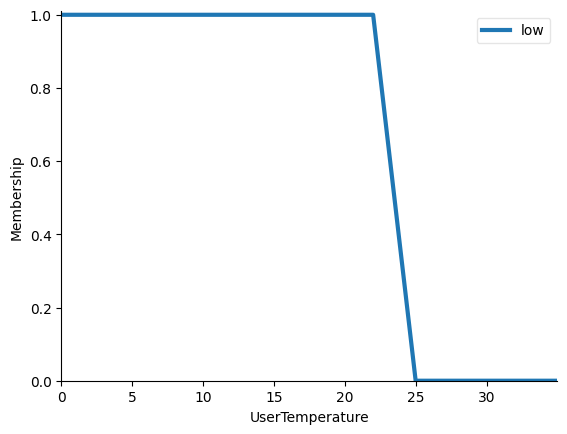

In [ ]:
userTemp['low'] = userTempMFLow(userTemp.universe, 18, 22, 25)
userTemp['low'].view()

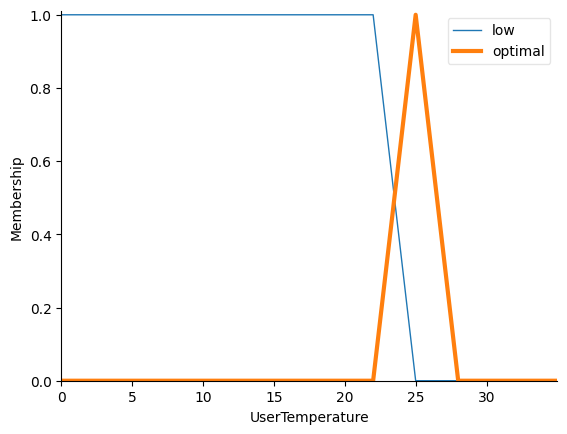

In [ ]:
userTemp['optimal'] = userTempMFOpt(userTemp.universe, 22, 25, 28)
userTemp['optimal'].view()

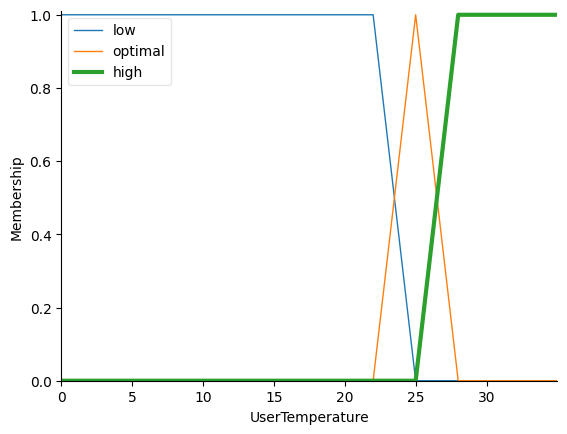

In [ ]:
userTemp['high'] = userTempMFHigh(userTemp.universe, 25, 28)
userTemp['high'].view()

### Temperature Difference

In [ ]:
len(tempDiff.universe)

600

In [ ]:
def tempDiffMFNeg(x, a, b):
    memb_values = np.ones_like(x, dtype = float)

    decr = (x >= a) & (x < b)
    memb_values[decr] = 1 - (x[decr] - a) / (b - a)

    memb_values[(x >= b)] = 0

    return memb_values

In [ ]:
def tempDiffMFZero(x, a, b, c):
    return userTempMFOpt(x, a, b, c)

In [ ]:
def tempDiffMFPos(x, a, b, c):
    return userTempMFOpt(x, a, b, c)

In [ ]:
def tempDiffMFLrg(x, a, b):
    return userTempMFHigh(x, a, b)

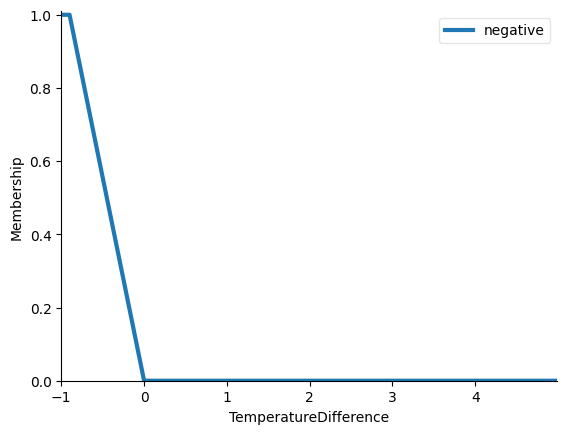

In [ ]:
tempDiff['negative'] = tempDiffMFNeg(tempDiff.universe, -0.9, 0)
tempDiff['negative'].view()

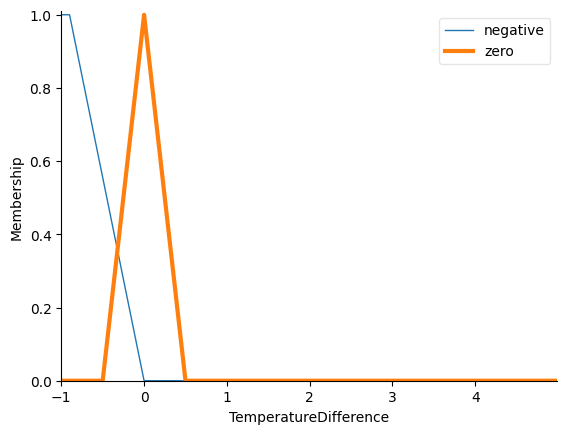

In [ ]:
tempDiff['zero'] = tempDiffMFZero(tempDiff.universe, -0.5, 0, 0.5)
tempDiff['zero'].view()

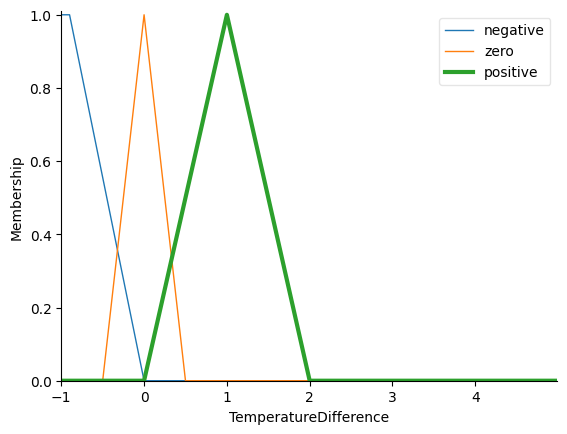

In [ ]:
tempDiff['positive'] = tempDiffMFPos(tempDiff.universe, 0, 1, 2)
tempDiff['positive'].view()

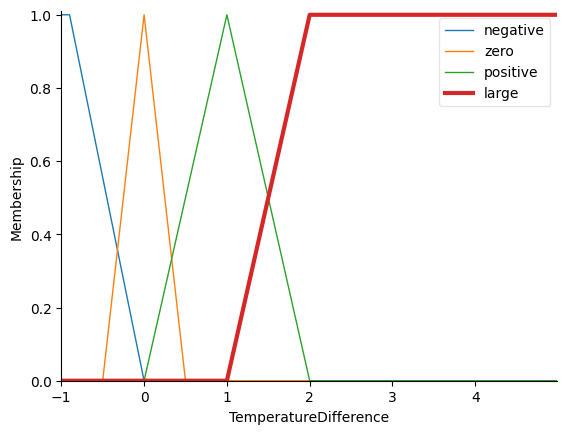

In [ ]:
tempDiff['large'] = tempDiffMFLrg(tempDiff.universe, 1, 2)
tempDiff['large'].view()

###Dew Point

In [ ]:
len(dewPt.universe)

900

In [ ]:
def dewPtMFOpt(x, a, b, c):
    return userTempMFLow(x, a, b, c)

In [ ]:
def dewPtMFHumid(x, a, b):
    return userTempMFHigh(x, a, b)

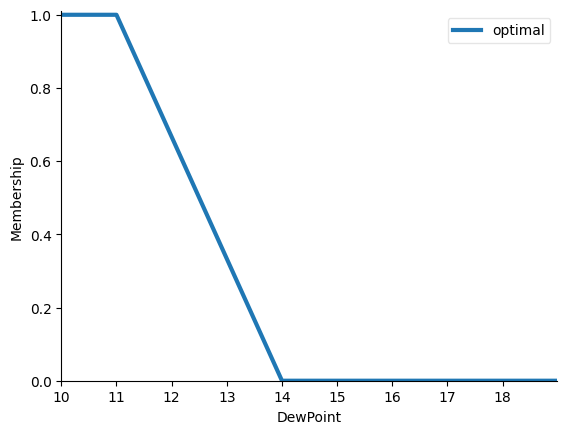

In [ ]:
dewPt['optimal'] = dewPtMFOpt(dewPt.universe, 10, 11, 14)
dewPt['optimal'].view()

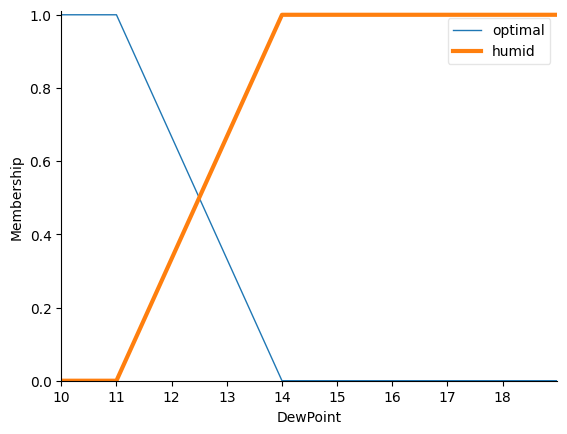

In [ ]:
dewPt['humid'] = dewPtMFHumid(dewPt.universe, 11, 14)
dewPt['humid'].view()

###Electric Volt

In [ ]:
len(elecVolt.universe)

9100

In [ ]:
def elecVoltMFLow(x, a, b, c):
    return userTempMFLow(x, a, b, c)

In [ ]:
def elecVoltMFReg(x, a, b):
    return userTempMFHigh(x, a, b)

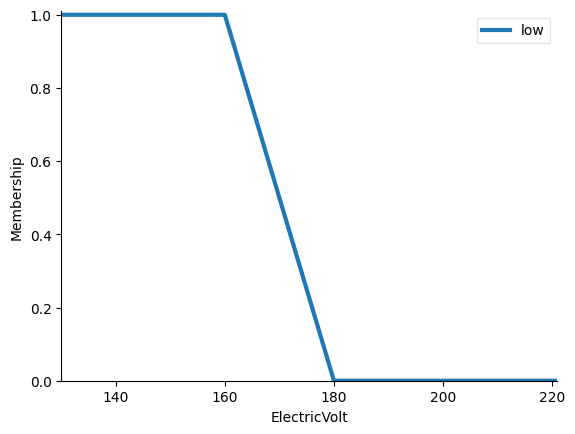

In [ ]:
elecVolt['low'] = elecVoltMFLow(elecVolt.universe, 130, 160, 180)
elecVolt['low'].view()

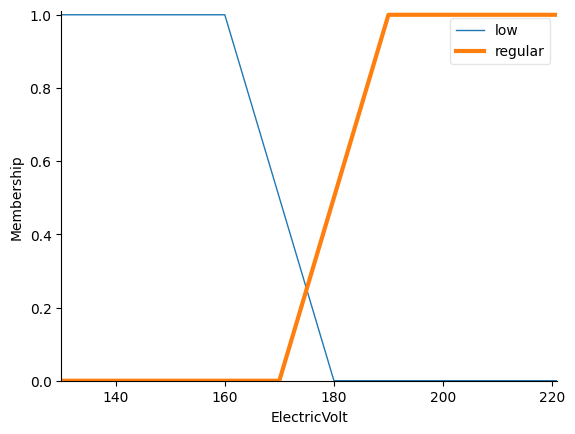

In [ ]:
elecVolt['regular'] = elecVoltMFReg(elecVolt.universe, 170, 190)
elecVolt['regular'].view()

## Output Functions

In [ ]:
cmprSpeed = ctrl.Consequent(np.arange(0, 100.01, 0.01), 'CompressorSpeed')
fanSpeed = ctrl.Consequent(np.arange(0, 100.01, 0.01), 'FanSpeed')
modeOfOp = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'ModeOfOperation')
finDir = ctrl.Consequent(np.arange(0, 90.01, 0.01), 'FinDirection')

### Compressor Speed

In [ ]:
len(cmprSpeed.universe)

10001

In [ ]:
def cmprSpeedMFLow(x, a, b, c):
    return userTempMFLow(x, a, b, c)

In [ ]:
def cmprSpeedMFMedium(x, a, b, c):
    return userTempMFOpt(x, a, b, c)

In [ ]:
def cmprSpeedMFFast(x, a, b):
    return userTempMFHigh(x, a, b)

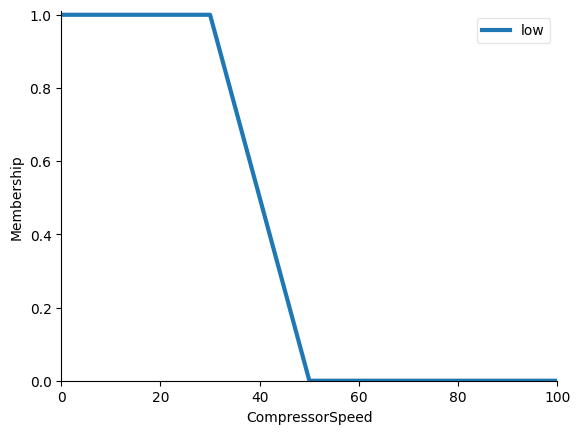

In [ ]:
cmprSpeed['low'] = cmprSpeedMFLow(cmprSpeed.universe, 0, 30, 50)
cmprSpeed['low'].view()

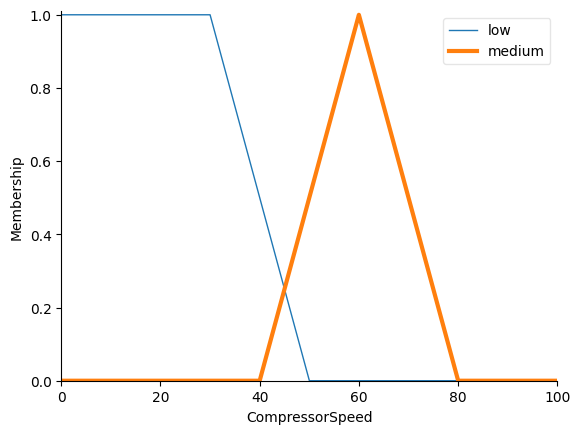

In [ ]:
cmprSpeed['medium'] = cmprSpeedMFMedium(cmprSpeed.universe, 40, 60, 80)
cmprSpeed['medium'].view()

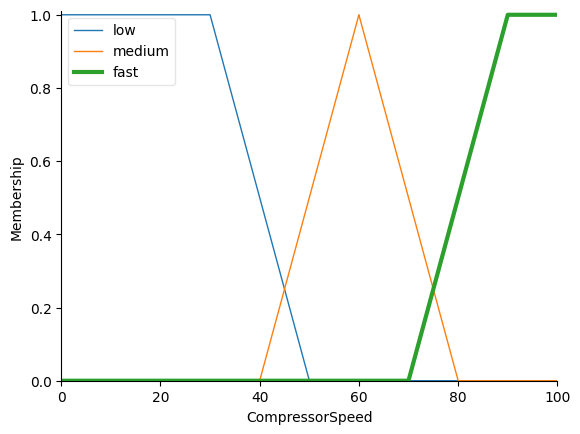

In [ ]:
cmprSpeed['fast'] = cmprSpeedMFFast(cmprSpeed.universe, 70, 90)
cmprSpeed['fast'].view()

### Fan Speed

In [ ]:
len(fanSpeed.universe)

10001

In [ ]:
def fanSpeedMFLow(x, a, b, c):
    return userTempMFLow(x, a, b, c)

In [ ]:
def fanSpeedMFMed(x, a, b, c):
    return userTempMFOpt(x, a, b, c)

In [ ]:
def fanSpeedMFFast(x, a, b):
    return userTempMFHigh(x, a, b)

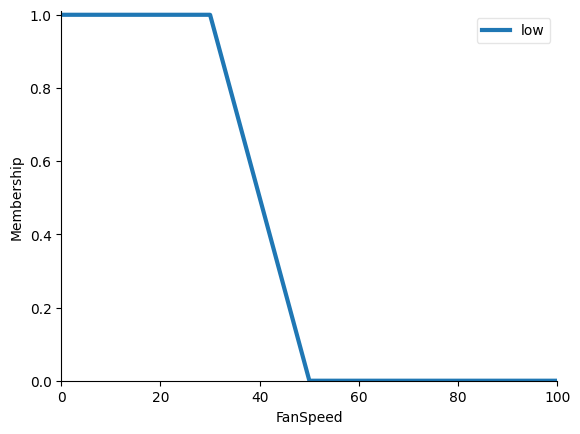

In [ ]:
fanSpeed['low'] = fanSpeedMFLow(fanSpeed.universe, 0, 30, 50)
fanSpeed['low'].view()

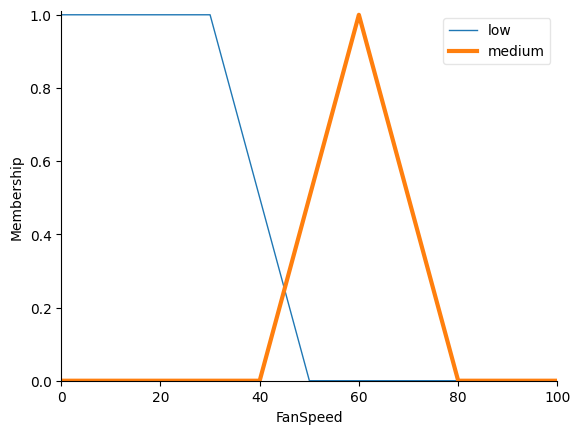

In [ ]:
fanSpeed['medium'] = fanSpeedMFMed(fanSpeed.universe, 40, 60, 80)
fanSpeed['medium'].view()

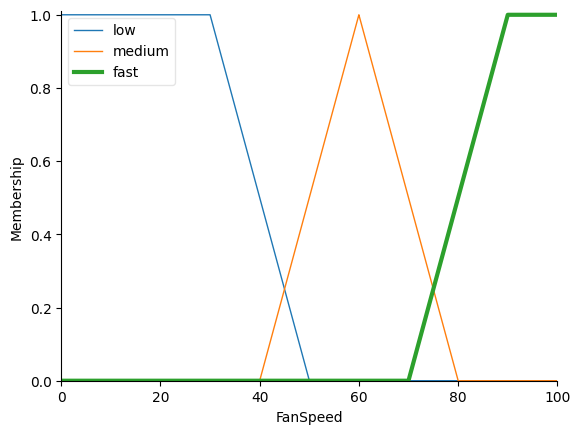

In [ ]:
fanSpeed['fast'] = fanSpeedMFFast(fanSpeed.universe, 70, 90)
fanSpeed['fast'].view()

### Mode of Operation

In [ ]:
len(modeOfOp.universe)

101

In [ ]:
def modeOfOpMFDhmd(x, a, b):
    memb_values = np.zeros_like(x, dtype = float)
    memb_values[(x <= a)] = 0.9
    #
    dec_mask = (x > a) & (x <= b)

    memb_values[dec_mask] = 0.9 - (0.9 * (x[dec_mask] - a) / (b - a))

    return memb_values

In [ ]:
def modeOfOpMFAirCon(x, a, b):
    return userTempMFHigh(x, a, b)

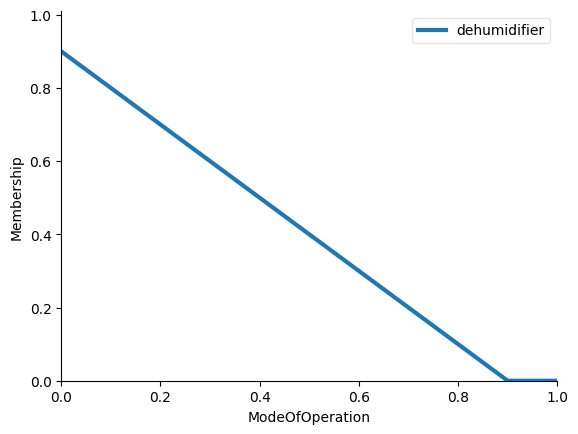

In [ ]:
modeOfOp['dehumidifier'] = modeOfOpMFDhmd(modeOfOp.universe, 0, 0.9)
modeOfOp['dehumidifier'].view()

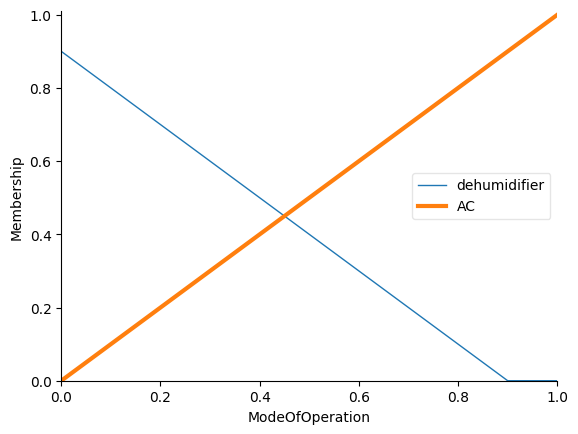

In [ ]:
modeOfOp['AC'] = modeOfOpMFAirCon(modeOfOp.universe, 0, 1)
modeOfOp['AC'].view()

### Fin Direction

In [ ]:
len(finDir.universe)

9001

In [ ]:
def finDirMFTowards(x, a, b, c):
    return userTempMFLow(x, a, b, c)

In [ ]:
def finDirMFAway(x, a, b):
    return userTempMFHigh(x, a, b)

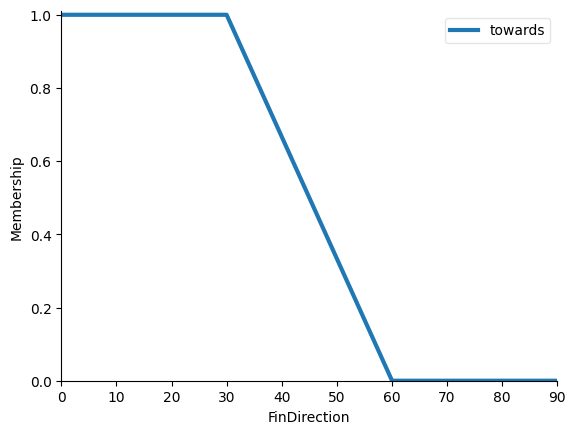

In [ ]:
finDir['towards'] = finDirMFTowards(finDir.universe, 0, 30, 60)
finDir['towards'].view()

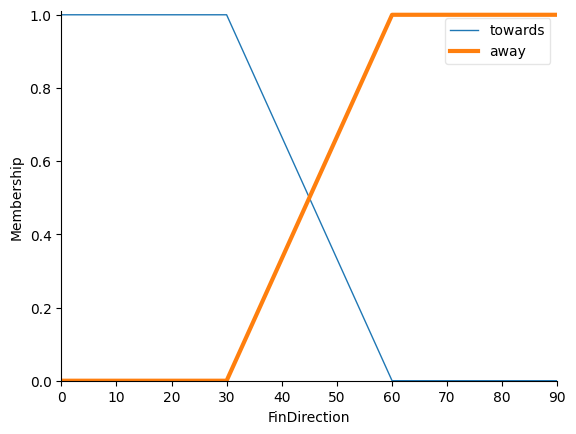

In [ ]:
finDir['away'] = finDirMFAway(finDir.universe, 30, 60)
finDir['away'].view()

## Creating the Rule Base

In [ ]:
rules = []

In [ ]:

# Rule 1
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['negative'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                     finDir['away'])))

# Rule 2
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['negative'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                         finDir['away'])))

# Rule 3
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['negative'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                      finDir['away'])))

# Rule 4
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['zero'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                 finDir['away'])))

#Rule 5
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['zero'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                     finDir['away'])))

#Rule 6
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['zero'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                  finDir['away'])))

# Rule 7
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['positive'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                     finDir['away'])))

# Rule 8
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['positive'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                         finDir['away'])))

# Rule 9
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['positive'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                      finDir['away'])))

# Rule 10
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['large'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                  finDir['away'])))

# Rule 11
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['large'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                      finDir['away'])))

# Rule 12
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['large'] & dewPt['optimal'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                   finDir['away'])))

# Rule 13
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['negative'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                         finDir['away'])))

# Rule 14
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['negative'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                             finDir['away'])))

# Rule 15
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['negative'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                          finDir['away'])))

# Rule 16
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['zero'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['fast'], modeOfOp['AC'],
                                                                                                     finDir['towards'])))

# Rule 17
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['zero'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['medium'], modeOfOp['AC'],
                                                                                                         finDir['towards'])))

# Rule 18
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['zero'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                      finDir['away'])))

# Rule 19
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['positive'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'], modeOfOp['AC'],
                                                                                                         finDir['towards'])))

# Rule 20
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['positive'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['medium'], fanSpeed['medium'], modeOfOp['AC'],
                                                                                                             finDir['towards'])))

# Rule 21
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['positive'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['medium'], fanSpeed['medium'], modeOfOp['AC'],
                                                                                                          finDir['towards'])))

# Rule 22
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['large'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'], modeOfOp['AC'],
                                                                                                      finDir['towards'])))

# Rule 23
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['large'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'], modeOfOp['AC'],
                                                                                                          finDir['towards'])))

# Rule 24
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['large'] & dewPt['optimal'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                       finDir['away'])))

# Rule 25
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['negative'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                   finDir['away'])))

# Rule 26
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['negative'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                       finDir['away'])))

# Rule 27
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['negative'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                    finDir['away'])))

# Rule 28
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['zero'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                               finDir['away'])))

# Rule 29
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['zero'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                   finDir['away'])))

# Rule 30
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['zero'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                finDir['away'])))

# Rule 31
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['positive'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                   finDir['away'])))

# Rule 32
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['positive'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                       finDir['away'])))

# Rule 33
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['positive'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                    finDir['away'])))

# Rule 34
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['large'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                finDir['away'])))

# Rule 35
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['large'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                    finDir['away'])))

# Rule 36
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['large'] & dewPt['humid'] & elecVolt['low'], (cmprSpeed['low'], fanSpeed['low'], modeOfOp['AC'],
                                                                                                 finDir['away'])))

# Rule 37
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['negative'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'],
                                                                                                       modeOfOp['dehumidifier'], finDir['towards'])))

# Rule 38
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['negative'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['low'],
                                                                                                           modeOfOp['dehumidifier'], finDir['away'])))

# Rule 39
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['negative'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['low'], fanSpeed['low'],
                                                                                                        modeOfOp['dehumidifier'], finDir['away'])))

# Rule 40
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['zero'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'],
                                                                                                   modeOfOp['dehumidifier'], finDir['towards'])))

# Rule 41
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['zero'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['medium'], fanSpeed['fast'],
                                                                                                       modeOfOp['dehumidifier'], finDir['towards'])))

# Rule 42
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['zero'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['medium'], fanSpeed['medium'],
                                                                                                    modeOfOp['dehumidifier'], finDir['towards'])))

# Rule 43
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['positive'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'],
                                                                                                       modeOfOp['AC'], finDir['towards'])))

# Rule 44
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['positive'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['fast'],
                                                                                                           fanSpeed['fast'], modeOfOp['AC'], finDir['towards'])))

# Rule 45
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['positive'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['medium'],
                                                                                                        fanSpeed['fast'], modeOfOp['AC'], finDir['towards'])))

# Rule 46
rules.append(ctrl.Rule(userTemp['low'] & tempDiff['large'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'],
                                                                                                    modeOfOp['AC'], finDir['towards'])))

# Rule 47
rules.append(ctrl.Rule(userTemp['optimal'] & tempDiff['large'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'],
                                                                                                        modeOfOp['AC'], finDir['towards'])))

# Rule 48
rules.append(ctrl.Rule(userTemp['high'] & tempDiff['large'] & dewPt['humid'] & elecVolt['regular'], (cmprSpeed['fast'], fanSpeed['fast'],
                                                                                                     modeOfOp['AC'], finDir['towards'])))

In [ ]:
ac_controller = ctrl.ControlSystem(rules)

## Simulating the System

In [ ]:
ac_sim = ctrl.ControlSystemSimulation(ac_controller)

In [ ]:
ac_sim.input['UserTemperature'] = 31
ac_sim.input['TemperatureDifference'] = 1.1
ac_sim.input['DewPoint'] = 12
ac_sim.input['ElectricVolt'] = 177

ac_sim.compute()

In [ ]:
ac_sim.output

{'CompressorSpeed': 50.825576519915046,
 'FanSpeed': 58.95312177408854,
 'ModeOfOperation': 0.581313131313131,
 'FinDirection': 36.80937500000006}

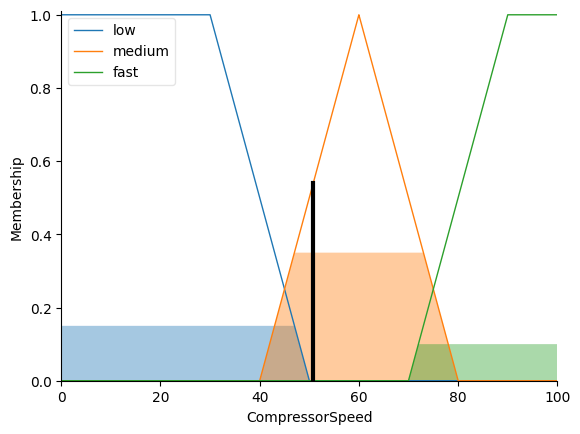

In [ ]:
cmprSpeed.view(sim = ac_sim)